In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from operator import itemgetter
from itertools import permutations, product
from Adversary import visualize
matplotlib.rcParams["figure.dpi"] = 120
import networkx as nx

In [2]:
def get_cycles(n):
    cycles = []
    for perm in permutations(range(1, n)):
        cycles.append((0,) + perm)
    return cycles
def to_str(l):
    return ''.join(str(a) for a in l)
def list_to_str(L):
    return [to_str(l) for l in L]
    
def get_special_cycles(n, m):
    perm_items = list(product(range(n), range(m)))
    # print(perm_items)
    index_cycles = get_cycles(n*m)
    # print('got all cycles')
    # print(index_cycles)
    cycles = [tuple(to_str(perm_items[index_cycle[i]]) for i in range(n*m)) for index_cycle in index_cycles]
    special_cycles = []
    # print(cycles)
    for cycle in cycles:
        if cycle[-1][1]=='0':
            # print(cycle)
            special_cycles.append(cycle)
    assignment = cycle_sort(special_cycles)
    # print('returning special cycles')
    return special_cycles, assignment

def cycle_map(cycles):
    # n = len(cycles[0])
    preimage_dict = {}
    for cycle in cycles:
        val = cycle[-1][0]
        if val not in preimage_dict:
            preimage_dict[val] = [cycle]
        else:
            preimage_dict[val].append(cycle)
    return preimage_dict
    
def cycle_sort(cycles):
    cycles.sort(key=itemgetter(-1))
    return {cycles[i]: i for i in range(len(cycles))}

def shift(cycle, l, k):
    cycle2 = cycle[:k+1] + cycle[l+1:] + cycle[k+1:l+1]
    return cycle2
def cycle_mat_l(cycles, assignment, i):
    mat = np.zeros((len(cycles), len(cycles)))
    for cycle in cycles:
        # print('cycle?', cycle)
        # print(cycle[i])
        if cycle[i][1] == '0':
            # print('cycle', cycle)
            cyclei = assignment[cycle]
            for k in range(i):
                cycle2 = shift(cycle, i, k)
                cycle2i = assignment[cycle2] 
                # print(cycle2)
                mat[cyclei, cycle2i] = 1
                # mat[cycle2i, cyclei] = 1
                # mat[cyclei, cyclei] = 2
                # mat[cycle2i, cycle2i] = 2

    return mat

def cycle_mat_k(cycles, assignment, k):
    mat = np.zeros((len(cycles), len(cycles)))
    for cycle in cycles:
        for l in range(k+1, len(cycles[0])-1):
            # print('l', l, cycle[l])
            if cycle[l][1] == '0':
                cycle2 = shift(cycle, l, k)
                # print('here', cycles.index(cycle),cycles.index(cycle2))
                mat[assignment[cycle], assignment[cycle2]] = 1
                # print('max', np.max(mat))
    return mat

def ymat(cycles, assignment, y):
    mat = np.zeros((len(cycles), len(cycles)))
    for cycle in cycles:
        # print(y)
        l = cycle.index(str(y)+'0')
        if 1 < l < len(cycle)-1:
            for k in range(l):
                cycle2 = shift(cycle, l, k)
                mat[assignment[cycle], assignment[cycle2]] = 1
    return mat
            
            
# print(special_cycles)
# # print(assignment)
# mat = 0*cycle_mat_l(special_cycles, 1)
# for i in range(1, n*m-1):
#     mat = mat + cycle_mat_l(special_cycles, i)
# plt.imshow(mat)
# # plt.imshow(mat-mat.T)

In [3]:
n=6
m=1
special_cycles, assignment = get_special_cycles(n,m)
print(special_cycles)
# print(special_cycles)
# assignment = cycle_map(special_cycles)
# print(special_cycles)
# print(assignment)

[('00', '20', '30', '40', '50', '10'), ('00', '20', '30', '50', '40', '10'), ('00', '20', '40', '30', '50', '10'), ('00', '20', '40', '50', '30', '10'), ('00', '20', '50', '30', '40', '10'), ('00', '20', '50', '40', '30', '10'), ('00', '30', '20', '40', '50', '10'), ('00', '30', '20', '50', '40', '10'), ('00', '30', '40', '20', '50', '10'), ('00', '30', '40', '50', '20', '10'), ('00', '30', '50', '20', '40', '10'), ('00', '30', '50', '40', '20', '10'), ('00', '40', '20', '30', '50', '10'), ('00', '40', '20', '50', '30', '10'), ('00', '40', '30', '20', '50', '10'), ('00', '40', '30', '50', '20', '10'), ('00', '40', '50', '20', '30', '10'), ('00', '40', '50', '30', '20', '10'), ('00', '50', '20', '30', '40', '10'), ('00', '50', '20', '40', '30', '10'), ('00', '50', '30', '20', '40', '10'), ('00', '50', '30', '40', '20', '10'), ('00', '50', '40', '20', '30', '10'), ('00', '50', '40', '30', '20', '10'), ('00', '10', '30', '40', '50', '20'), ('00', '10', '30', '50', '40', '20'), ('00', '10'

In [4]:
k_mats = [cycle_mat_k(special_cycles,assignment, k) for k in range(n*m-2)]
k_sum = np.sum(k_mats, 0)
print('done')
l_mats = [cycle_mat_l(special_cycles, assignment, l) for l in range(1, n*m-1)]
l_sum = np.sum(l_mats, 0) 
y_mats = [ymat(special_cycles, assignment, y) for y in range(1,n)]
y_sum =np.sum(y_mats, 0)

done


In [5]:
def remove_zeros(mat):
    eps = 0.00000000001
    num_rows, num_cols = mat.shape
    rows = np.array([r for r in range(num_rows) if np.linalg.norm(mat[r,:])>=eps])
    cols = np.array([c for c in range(num_rows) if np.linalg.norm(mat[:,c])>=eps])
    mat = mat[rows, :]
    mat = mat[:, cols]
    return mat

9.999999999999995
0 1.0
evals 0.9999999999999994 4.000000000000001
norm 4.000000000000001


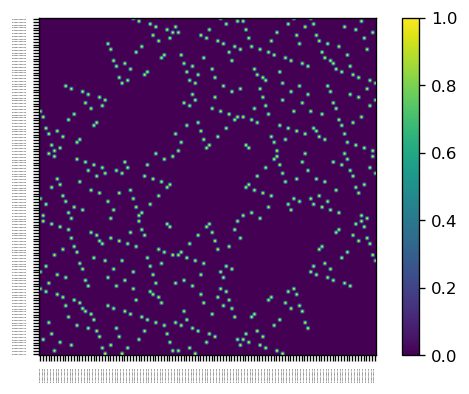

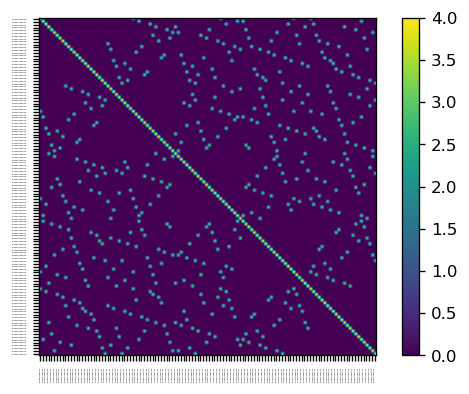

1 1.0
evals 0.9999999999999988 3.000000000000001
norm 3.000000000000001


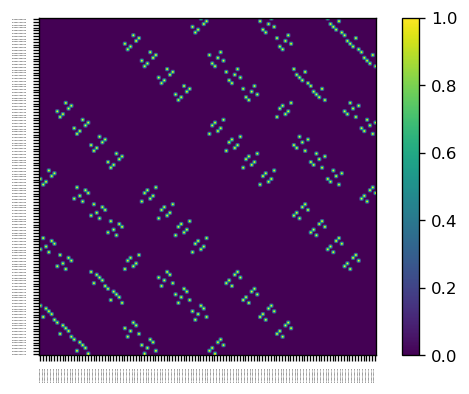

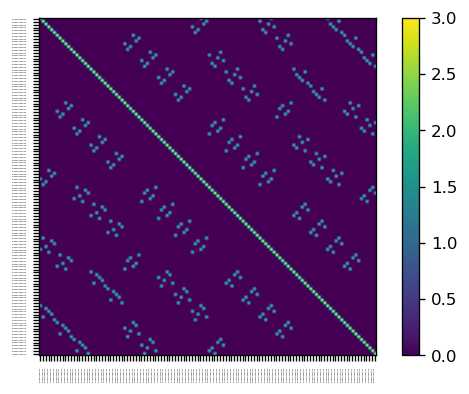

2 1.0
evals 0.999999999999999 2.0000000000000004
norm 2.0000000000000004


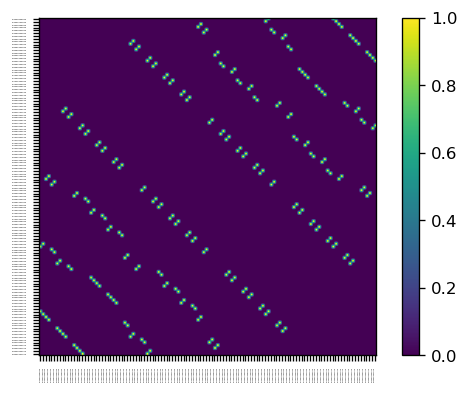

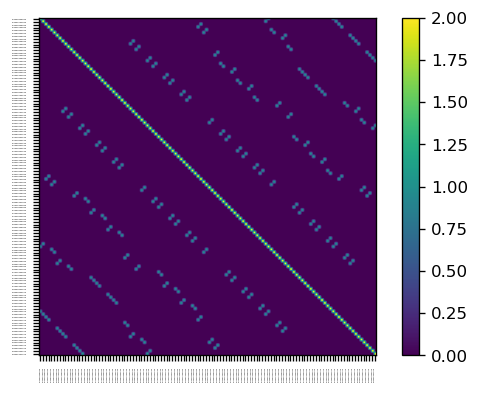

3 1.0
evals 1.0 1.0
norm 1.0


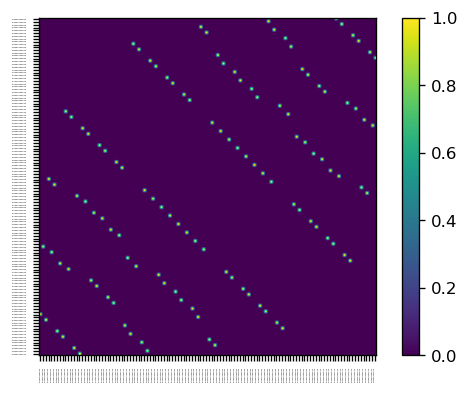

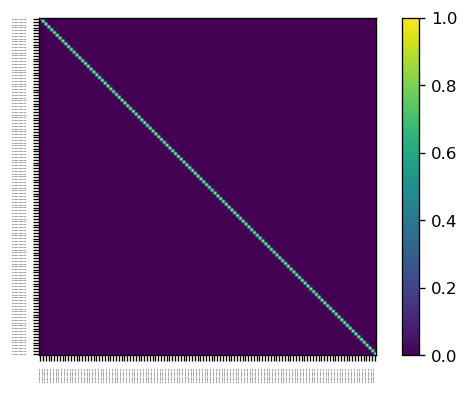

In [61]:
# plt.imshow(k_sum)
# plt.show()
print(np.linalg.norm(k_sum, 2))
special_cycles_str = list_to_str(special_cycles)
for k in range(len(k_mats)):
    reduced = (k_mats[k])
    print(k, np.max(reduced))
    evals = np.linalg.svd(reduced, full_matrices=False, compute_uv=False)
    # evals.sort()
    # print(evals)
    # L =np.linalg.cholesky(1*np.eye(reduced.shape[0])+reduced)
    # print(set(np.round(L, 7).flatten()))
    # print(set(reduced.flatten()))
    # print('sym', np.sum(np.abs(reduced -reduced.T)))
    print('evals', np.min(evals), np.max(evals))
    square = reduced@reduced
    print('norm', np.linalg.norm(reduced,2))
    # print('square', np.sum(np.abs((np.ones(reduced.shape[0])-np.eye(reduced.shape[0]))*square)))
    visualize(reduced, (special_cycles_str, special_cycles_str))
    G = nx.from_numpy_array(reduced)
    pos = nx.spring_layout(G, scale=.1)
    # pos = None
    # nx.draw(G ,pos=pos, node_size=.5)
    # plt.show()
    visualize( square, (special_cycles_str, special_cycles_str))
    # plt.colorbar()
    # plt.show()
    # plt.imshow(np.linalg.eig(reduced)[1])
    # plt.colorbar()
    # plt.show()

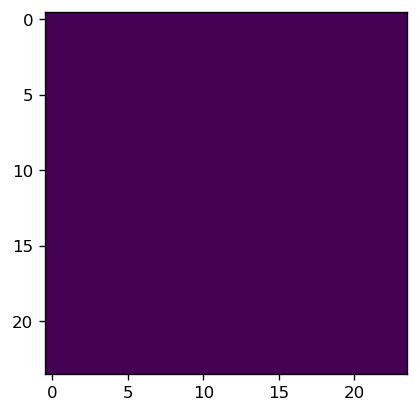

-3.0000000000000053

In [13]:
plt.imshow(l_sum-l_sum.T)
plt.show()
np.min(np.linalg.eigvals(l_sum))

In [14]:
np.max(np.linalg.eigvals(l_sum))

6.000000000000003

In [7]:
A = np.random.random((4,4))
print(A)

[[0.08705945 0.1885719  0.24297608 0.59341819]
 [0.03886692 0.87073954 0.23663985 0.28113241]
 [0.20668787 0.84606035 0.67248508 0.46901606]
 [0.50186163 0.45046278 0.86116594 0.01316572]]


In [11]:
B = A[[1,2,3],:]
print(B)
C = B[:, [2,3]]
print(C)

[[0.03886692 0.87073954 0.23663985 0.28113241]
 [0.20668787 0.84606035 0.67248508 0.46901606]
 [0.50186163 0.45046278 0.86116594 0.01316572]]
[[0.23663985 0.28113241]
 [0.67248508 0.46901606]
 [0.86116594 0.01316572]]
